# Find best jobs by Salary, Company Rating and Location

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = './data'

data_file = os.path.join(data_dir, 'processed_data_1.csv')

df = pd.read_csv(data_file, index_col=0)

In [3]:
df

,job_title,company_name,rating,industry,city,state,min_revenue,max_revenue,min_salary_estimate,max_salary_estimate,avg_salary_estimate,avg_revenue
0,"Data Analyst, Center on Immigration and Justic...",Vera Institute of Justice,3.2,Social Assistance,New York,NY,100,500,37000,66000,51500,300.0
1,Quality Data Analyst,Visiting Nurse Service of New York,3.8,Health Care Services & Hospitals,New York,NY,2000,5000,37000,66000,51500,3500.0
3,Data Analyst,Celerity,4.1,IT Services,New York,NY,50,100,37000,66000,51500,75.0
4,Reporting Data Analyst,FanDuel,3.9,Sports & Recreation,New York,NY,100,500,37000,66000,51500,300.0
7,Data Science Analyst,GNY Insurance Companies,3.7,Insurance Carriers,New York,NY,100,500,37000,66000,51500,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2245,Data Analyst Supporting the DEA #20-242,Forfeiture Support Associates,2.8,Staffing & Outsourcing,Centennial,CO,50,100,78000,104000,91000,75.0
2247,Marketing/Communications - Data Analyst-Marketing,APN Software Services Inc.,4.1,Computer Hardware & Software,Broomfield,CO,25,50,78000,104000,91000,37.5
2249,Senior Data Analyst (Corporate Audit),Arrow Electronics,2.9,Wholesale,Centennial,CO,10000,10000,78000,104000,91000,10000.0
2251,"Data Analyst 3, Customer Experience",Contingent Network Services,3.1,Enterprise Software & Network Solutions,Centennial,CO,25,50,78000,104000,91000,37.5


In [4]:
df['avg_salary_estimate'].describe()

count      1413.000000
mean      71409.058740
std       23455.303224
min       33500.000000
25%       56000.000000
50%       68000.000000
75%       80500.000000
max      150000.000000
Name: avg_salary_estimate, dtype: float64

In [5]:
df['rating'].describe()

count    1413.000000
mean        3.732059
std         0.617771
min         1.000000
25%         3.300000
50%         3.700000
75%         4.100000
max         5.000000
Name: rating, dtype: float64

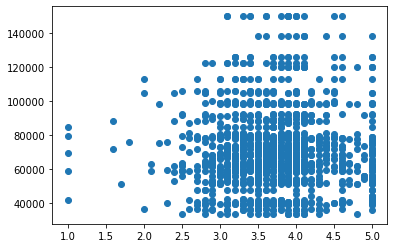

In [6]:
plt.scatter(df['rating'], df['avg_salary_estimate'])

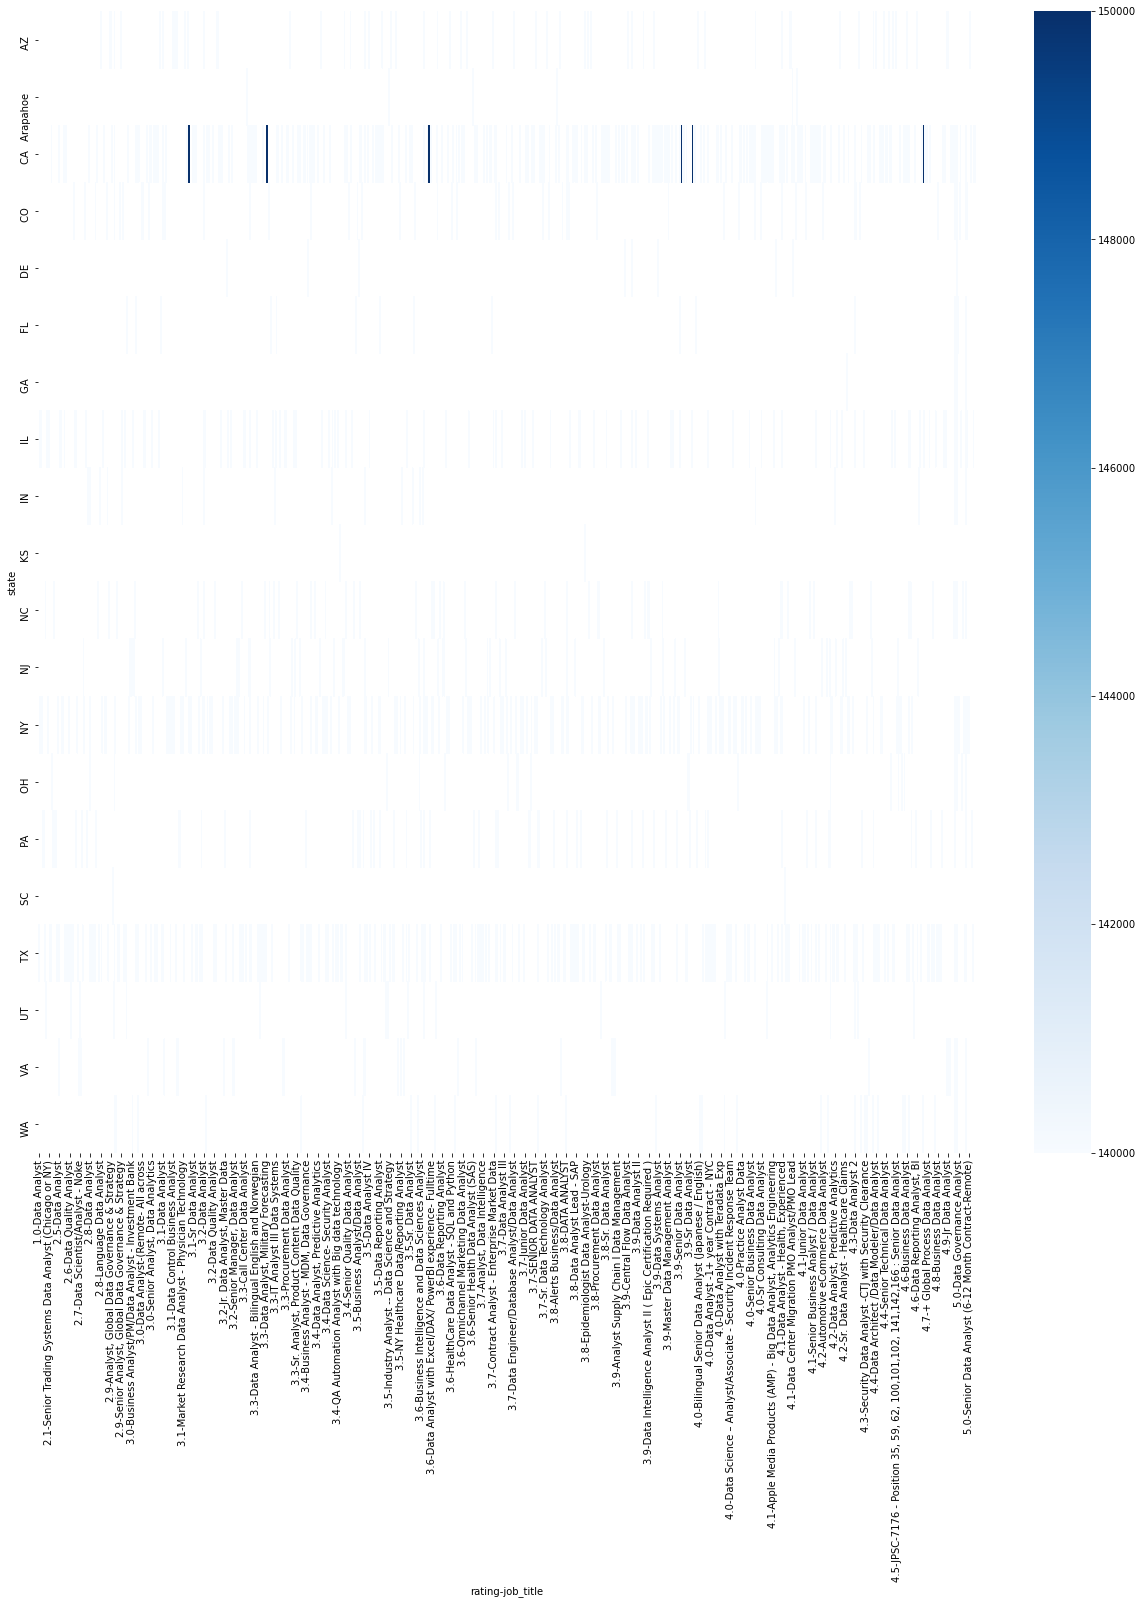

In [7]:
plt.rcParams['figure.figsize'] = (21, 21)

heatmap1_data = pd.pivot_table(df, values='avg_salary_estimate', 
                               index=['state'],
                               columns=['rating', 'job_title'])
                    

sns.heatmap(heatmap1_data, vmin=140000, cmap="Blues")

plt.show()

In [8]:
df.query('avg_salary_estimate > 148000 and rating > 4.5')

,job_title,company_name,rating,industry,city,state,min_revenue,max_revenue,min_salary_estimate,max_salary_estimate,avg_salary_estimate,avg_revenue
1469,Senior HR Data Analyst,NVIDIA,4.6,Computer Hardware & Software,Santa Clara,CA,5000,10000,110000,190000,150000,7500.0


In [9]:
df.query('avg_salary_estimate > 148000 and rating > 4.0 and rating <= 4.5')

,job_title,company_name,rating,industry,city,state,min_revenue,max_revenue,min_salary_estimate,max_salary_estimate,avg_salary_estimate,avg_revenue
1468,Data Analyst,OSI Engineering,4.5,Staffing & Outsourcing,Newark,CA,25,50,110000,190000,150000,37.5
1489,Data Analyst,BayOne Solutions,4.1,IT Services,Sunnyvale,CA,5,10,110000,190000,150000,7.5


In [10]:
df.query('avg_salary_estimate > 148000 and rating > 3.5 and rating <= 4.0')

,job_title,company_name,rating,industry,city,state,min_revenue,max_revenue,min_salary_estimate,max_salary_estimate,avg_salary_estimate,avg_revenue
1470,Sr. Data Analyst - Growth & Adoption,Risk Management Solutions (RMS),3.9,Enterprise Software & Network Solutions,Newark,CA,100,500,110000,190000,150000,300.0
1471,Data Analyst,LeanData,4.0,Enterprise Software & Network Solutions,Santa Clara,CA,10,25,110000,190000,150000,17.5
1477,Data Analyst,IntraEdge,3.8,IT Services,Menlo Park,CA,50,100,110000,190000,150000,75.0
1478,Data Analyst,Connor Group,4.0,Accounting,Santa Clara,CA,25,50,110000,190000,150000,37.5
1482,Data Analyst I,ICONMA,3.6,Staffing & Outsourcing,Cupertino,CA,100,500,110000,190000,150000,300.0
1487,Data Analyst I,"TalentBurst, Inc.",3.9,IT Services,Cupertino,CA,50,100,110000,190000,150000,75.0
1490,Data Analyst,Zipongo,4.0,Health Care Services & Hospitals,San Jose,CA,5,10,110000,190000,150000,7.5
1492,Senior Data Analyst Studio Finance Engineering,Netflix,3.9,Internet,Los Gatos,CA,5000,10000,110000,190000,150000,7500.0
1494,Data Analyst,Kaygen Inc.,3.9,Consulting,San Jose,CA,1,5,110000,190000,150000,3.0
1495,Data Analyst,"Iconma, L.L.C.",3.6,Staffing & Outsourcing,Sunnyvale,CA,100,500,110000,190000,150000,300.0
